## Time Series Forcasting of Google Stock Price
### Dataset downloaded on kaggle sites

### Import important library to read dataset and visualize data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# import csv file of google stock price in my local drive
df_train=pd.read_csv('Google_Stock_Price_Train.csv',header=0,parse_dates=[0])

In [3]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


### To check the datatypes of each columns using info

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   object        
 5   Volume  1258 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 59.1+ KB


### Check Null value in dataset

In [5]:
df_train.isnull().sum().sort_values(ascending=False)

Volume    0
Close     0
Low       0
High      0
Open      0
Date      0
dtype: int64

In [6]:
df_train.Date.dtypes

dtype('<M8[ns]')

## Data Visualization

### Line plot

In [7]:
df=df_train.copy()

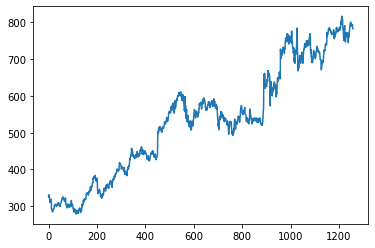

In [8]:
df['Open'].plot()

In [9]:
# now set index of date then plot 
df.index=df['Date']

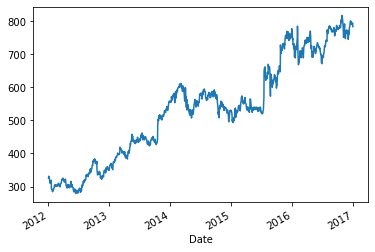

In [10]:
df['Open'].plot()

### Zooming IN method used for certain specific dates

In [11]:
#we get the data one year
df1=df[(df.Date>='2012-01-03') & (df.Date<='2012-12-30')]
df1.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2012-01-03,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


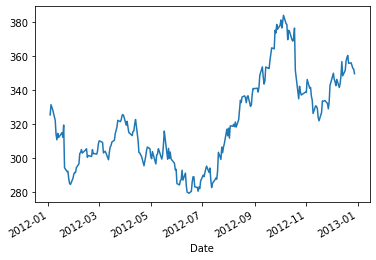

In [12]:
df1.Open.plot()

### Adding Trend Line

### Trend Line to help to get realtionship is positive and negative 
#### If trend line slop is positive then data increases with increase X-axis

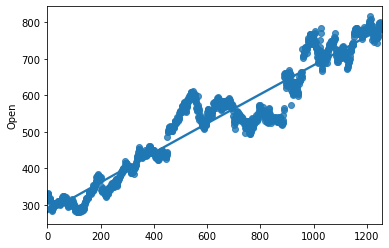

In [13]:
sns.regplot(df_train.index,df.Open,order=2)

### Remove Seasonability

In [14]:
df['year']=df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Volume,year
Date,,,,,,,
2012-01-03,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500",2012
2012-01-04,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400",2012
2012-01-05,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300",2012
2012-01-06,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900",2012
2012-01-09,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800",2012


In [15]:
df.groupby('year')['Open'].mean()

year
2012    320.195040
2013    440.160119
2014    560.709643
2015    602.057341
2016    743.732460
Name: Open, dtype: float64

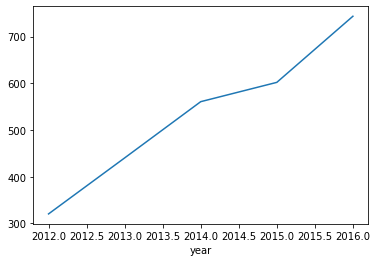

In [16]:
df.groupby('year')['Open'].mean().plot()

### Creating Lag plot

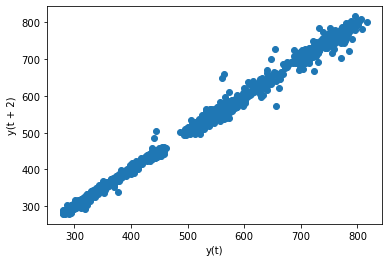

In [17]:
from pandas.plotting import lag_plot
lag_plot(df.Open,lag=2)

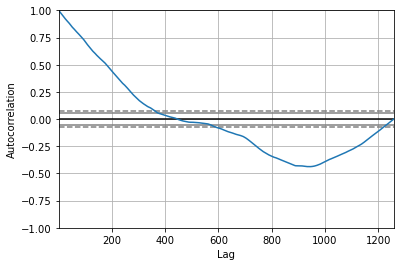

In [18]:
from pandas.plotting import autocorrelation_plot as ap
ap(df.Open)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8BF12F640>,
      dtype=object)

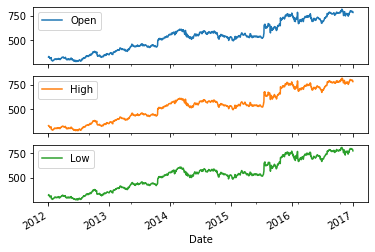

In [19]:
df_train.set_index('Date')[['Open','High','Low']].plot(subplots=True)

### Now Preprocessing the data Decide Input Feature and output 

In [53]:
# Take input features
X=df_train[['Open','High','Low']]
X
## only take only 3 columns

,Open,High,Low
0,325.25,332.83,324.97
1,331.27,333.87,329.08
2,329.83,330.75,326.89
3,328.34,328.77,323.68
4,322.04,322.29,309.46
...,...,...,...
1253,790.90,792.74,787.28
1254,790.68,797.86,787.66
1255,793.70,794.23,783.20
1256,783.33,785.93,778.92


In [54]:
X.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


## Min Max Scaler use for to normalize the data 

In [55]:
## Feature Scaling tha Data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_scaled=sc.fit_transform(X)

In [56]:
X_scaled

array([[0.08581368, 0.09640129, 0.09044931],
       [0.09701243, 0.09834351, 0.09823458],
       [0.09433366, 0.09251685, 0.09408623],
       ...,
       [0.95725128, 0.95807422, 0.95844067],
       [0.93796041, 0.94257381, 0.95033338],
       [0.93688146, 0.93669113, 0.93421352]])

### Take Output of dataset is Open Column

In [57]:
#Take Output 
Y=X_scaled[:,0]
Y

array([0.08581368, 0.09701243, 0.09433366, ..., 0.95725128, 0.93796041,
       0.93688146])

### Now Split the Data into training and testing

### For split the data,  import train test split library form sklearn 

In [81]:
from sklearn.model_selection import train_test_split
# Divided the training and test dataser into 80:20 ratio
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.20,shuffle=False,random_state=123)

### Check the shape training and test dataset

In [60]:
x_train.shape

(1006, 3)

In [82]:
x_test.shape

(252, 3)

## Now import Timerseries Generator library to prepare the data for time series

In [62]:
## Preparation of Time Series Model
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf

In [90]:

train_generator=TimeseriesGenerator(x_train,y_train,length=10,batch_size=32)
test_generator=TimeseriesGenerator(x_test,y_test,length=10,batch_size=32)

In [91]:
num_features=3
max_length=10

### Define LSTM Model

In [92]:
def LSTM_Model(max_length,num_feature):
    from keras.layers import LSTM,Dropout,Dense,LeakyReLU
    from keras import Sequential
    model=Sequential()
    model.add(LSTM(128,input_shape=(max_length,num_features),return_sequences=True))
    model.add(LeakyReLU(alpha=0.5))
    model.add(Dropout(0.3))
    model.add(LSTM(128,return_sequences=True))
    model.add(LeakyReLU(alpha=0.5))
    model.add(Dropout(0.3))
    model.add(LSTM(64,return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['mean_squared_error'])
    return model

In [87]:
# Call the LSTM function
model=LSTM_Model(10,3)

### Import Earlystopping from keras library to avoid the overfitting

In [97]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=5)

### Now fit the model  with 50 epochs

In [98]:
model_hist=model.fit(train_generator,validation_data=test_generator,shuffle=False,callbacks=[early_stopping],epochs=50)

Epoch 1/50
32/32 [==============================] - 2s 63ms/step - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 2/50
32/32 [==============================] - 2s 59ms/step - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 3/50
32/32 [==============================] - 2s 59ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 4/50
32/32 [==============================] - 2s 55ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 5/50
32/32 [==============================] - 2s 61ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 6/50
32/32 [==============================] - 2s 66ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 7/50
32/32 [================

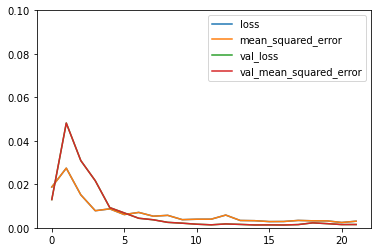

In [99]:
# Visualize loss and error
pd.DataFrame(model_hist.history).plot()
plt.gca().set_ylim(0,0.1)
plt.show()

In [100]:
# Evaluate the test dataset
model.evaluate(test_generator,verbose=0)

[0.0015122081385925412, 0.0015122081385925412]

### Predict the values of next 10 

In [105]:
test_pred=model.predict_generator(test_generator)
test_pred.shape

(242, 1)

### Merge the Predicted value with input feature for inverse the scaling

In [106]:
# Concat method use for merge the into data frame
df=pd.concat([pd.DataFrame(test_pred),pd.DataFrame(x_test[:,1:][10:])],axis=1)

In [107]:
df.shape

(242, 3)

### Now inverse the scaling data into normal form

In [108]:
rev_df=sc.inverse_transform(df)
rev_df

array([[738.94044313, 709.98      , 693.41      ],
       [734.63944176, 706.85      , 673.26      ],
       [729.3262629 , 719.19      , 694.46      ],
       [724.69389275, 728.13      , 720.12      ],
       [721.0399288 , 729.68      , 710.01      ],
       [718.63165768, 718.28      , 706.48      ],
       [718.13957089, 718.23      , 694.39      ],
       [717.58192806, 733.69      , 712.35      ],
       [718.01627684, 744.99      , 726.8       ],
       [720.47783226, 757.86      , 743.27      ],
       [724.53958294, 789.87      , 764.65      ],
       [729.39406181, 774.5       , 720.5       ],
       [736.30262977, 727.        , 701.86      ],
       [741.97313068, 703.99      , 680.15      ],
       [745.24048704, 684.03      , 663.06      ],
       [746.56698745, 699.9       , 668.77      ],
       [745.65183033, 701.31      , 682.13      ],
       [742.23240704, 689.35      , 668.87      ],
       [735.30990121, 693.75      , 678.6       ],
       [726.06473801, 698.     

## create new dataframe which contain predicted value and actual value

In [113]:
DF=df_train[test_pred.shape[0]*-1:]

In [114]:
DF.count()

Date      242
Open      242
High      242
Low       242
Close     242
Volume    242
dtype: int64

In [115]:
# create new column in datarame of predicted value 
DF['Prediction_value']=rev_df[:,0]

<ipython-input-115-74fe415d4482>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Prediction_value']=rev_df[:,0]


### Visualize the predicted value and real data value

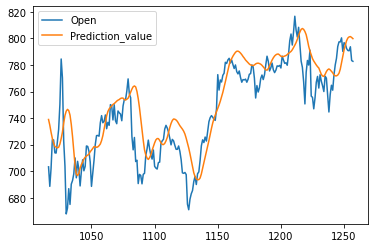

In [116]:
DF[['Open','Prediction_value']].plot()

#### Confidence Interval is calculated for Estimated Variable, not for an independent variable as you have done.

In [120]:
import scipy.stats as ss

confidence = 0.95
nsamples = len(DF.Prediction_value)
mean = DF.Prediction_value.mean()

# Standard Error = se
se = ss.sem(DF.Prediction_value)
h = se * ss.t.ppf((1 + confidence)/2, nsamples)
print(f"95% Confidence Interval: [{mean - h}, {mean + h}]")

95% Confidence Interval: [748.665283553656, 756.7297033254587]
